**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 4**
Exploración de datos

---

*   NOMBRE: Jessica López García
*   MATRÍCULA: A01795373

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
!ls "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 4/"


Actividad4EDA.ipynb  credit_risk_dataset.csv


In [3]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 4"
os.chdir(DIR)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import pandas as pd

df = pd.read_csv('credit_risk_dataset.csv')


In [6]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


# **Parte 1**. Análisis descriptivo (univariante)

1. Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas cualitativas?

8 columnas numéricas.
4 columnas cualitativas.

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


2. Determina el porcentaje de valores faltantes por columna.

La mayoría de las columnas no tienen valores faltantes.

La columna person_emp_length tiene aproximadamente el 2.75% de sus datos faltantes.

La columna loan_int_rate tiene aproximadamente el 9.56% de sus datos faltantes.

In [8]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print(missing_percentage)


person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64


# Análisis de variables numéricas

3. Obtén las siguientes estadísticas descriptivas para todas las variables numéricas:
*   Tendencia central (media, mediana)
*   Dispersión o variabilidad (min, max, desviación estándar, cuartiles)
*   Forma (asimetría y curtosis)
*   Clasifica las variables `person_age` y `loan_in_rate` según los valores observados de asimetría y curtosis

**NOTA**. Recuerda que muchas de estas estadísticas, puedes obtenerlas utilizando la función `describe()` y que la mediana está representada en el 2do cuartil (50%)

1. person_age:

*   Asimetría (Skewness): 2.581393
    
    La asimetría es positiva y mayor que 0, lo que indica que la distribución de person_age es asimétrica positiva. Esto significa que la cola se extiende más hacia la derecha.
*   Curtosis: 18.560825
    
    La curtosis es positiva y mayor que 0, lo que indica que la distribución es leptocúrtica. Esto significa que tiene colas más pesadas y un pico más agudo que una distribución normal.


2. loan_int_rate:

*   Asimetría (Skewness): 0.208550

    La asimetría es positiva pero cercana a 0, lo que indica que la distribución de loan_int_rate es ligeramente asimétrica positiva. Sin embargo, debido a que el valor es bastante cercano a 0, la distribución podría considerarse aproximadamente simétrica.

*   Curtosis: -0.671609

    La curtosis es negativa, lo que indica que la distribución es platicúrtica. Esto significa que tiene colas más ligeras y un pico menos agudo que una distribución normal.

In [9]:
description = df.describe()
print(description)
skewness = df.skew()
kurtosis = df.kurt()

print("Asimetría:\n", skewness)
print("\nCurtosis:\n", kurtosis)

         person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%   

<ipython-input-9-ded5ab380009>:3: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = df.skew()
<ipython-input-9-ded5ab380009>:4: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  kurtosis = df.kurt()


4. Utiliza histogramas para determinar la distribución de los valores representados en cada variable.
*   ¿Se corresponde con lo obtenido en el cálculo de asimetría? Como verás, los datos reales son más complejos que la teoría. Por esta razón, recuerda siempre acompañar el análisis de la asimetría con algún gráfico como un histograma.

**NOTA**. Para esto también puedes ocupar los gráficos `kde` ([kernel density estimation](https://www.cienciadedatos.net/documentos/pystats02-kernel-density-estimation-kde-python.html)) que crean una curva continua y suave expandiendo la idea del histograma.

Sí, se corresponde. La gráfica de la distribución de "person_age" muestra una clara asimetría positiva, lo que significa que la cola de la distribución se extiende hacia la derecha o hacia los valores más altos. Tanto en el histograma como en los gráficos KDE.

* Para person_age, el gráfico muestra una clara asimetría positiva, es decir, una cola que se extiende hacia la derecha, lo que coincide con el valor de asimetría positiva que se calculó previamente.

* En el caso de cb_person_cred_hist_length, la asimetría positiva se refleja en la distribución con una cola hacia la derecha, lo que indica que hay personas con historiales crediticios significativamente más largos que la mayoría, aunque son menos frecuentes.

* person_income presenta una asimetría muy pronunciada hacia la derecha en el gráfico, lo que indica que la mayoría de las personas tienen ingresos bajos, pero hay algunas con ingresos extremadamente altos.

* La variable person_emp_length también muestra una asimetría positiva, con la mayoría de las personas teniendo períodos de empleo más cortos y menos personas con períodos de empleo muy largos.

* En cuanto a loan_amnt, vemos varios picos en la distribución, pero también una cierta asimetría hacia la derecha, lo que indica que, aunque hay montos de préstamo comunes que son más frecuentes, también hay préstamos de montos más grandes, aunque son menos comunes.

* loan_int_rate (Tasa de interés del préstamo): El gráfico KDE de la tasa de interés del préstamo muestra una distribución bimodal, lo que significa que hay dos picos prominentes en los datos. Uno de los picos se encuentra alrededor del 7.5% y el otro alrededor del 15%. Esto podría indicar la existencia de dos grupos distintos en los datos, quizás relacionados con diferentes tipos de préstamos o perfiles de riesgo de los prestatarios.

* loan_status (Estado del préstamo): El gráfico de loan_status muestra claramente dos picos. El pico más pronunciado y estrecho cerca de 0 podría representar préstamos que no están en mora, mientras que el pico más amplio y menos pronunciado cerca de 1 podría representar préstamos que están en mora o tienen algún tipo de problema. Esta distinción binaria es típica en las evaluaciones de riesgo crediticio.

* loan_percent_income (Porcentaje del préstamo con respecto a los ingresos): El gráfico muestra una asimetría positiva, con un pico claro cerca del 0 y una cola que se extiende hacia la derecha. Esto indica que la mayoría de los prestatarios tienen préstamos que representan un porcentaje pequeño de sus ingresos, pero hay algunos prestatarios que tienen préstamos que representan una proporción significativamente mayor de sus ingresos.


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


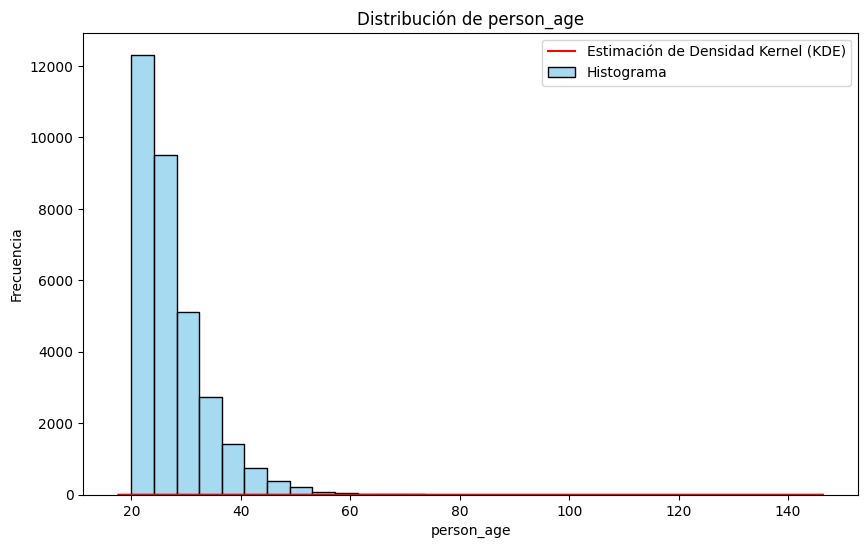

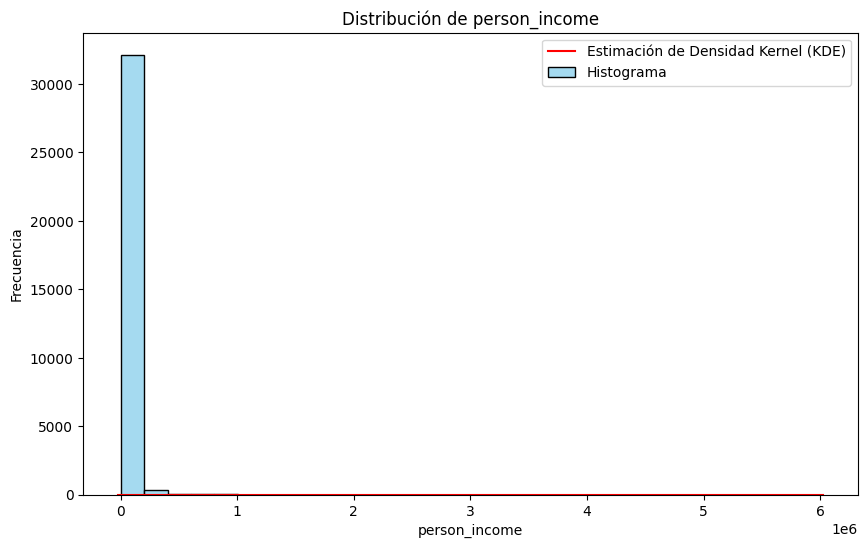

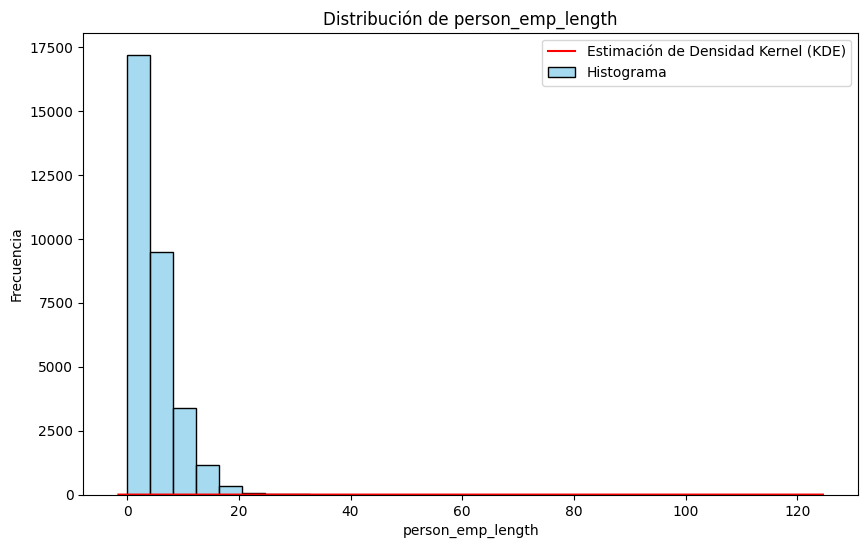

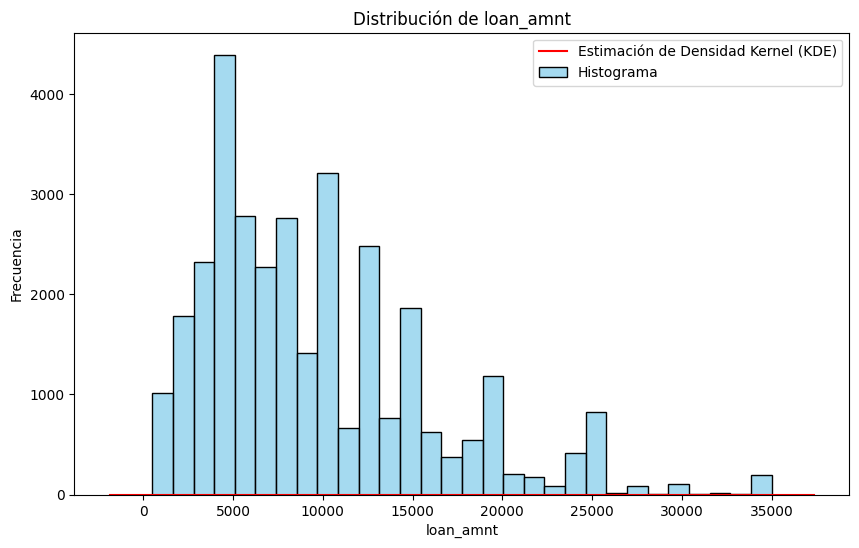

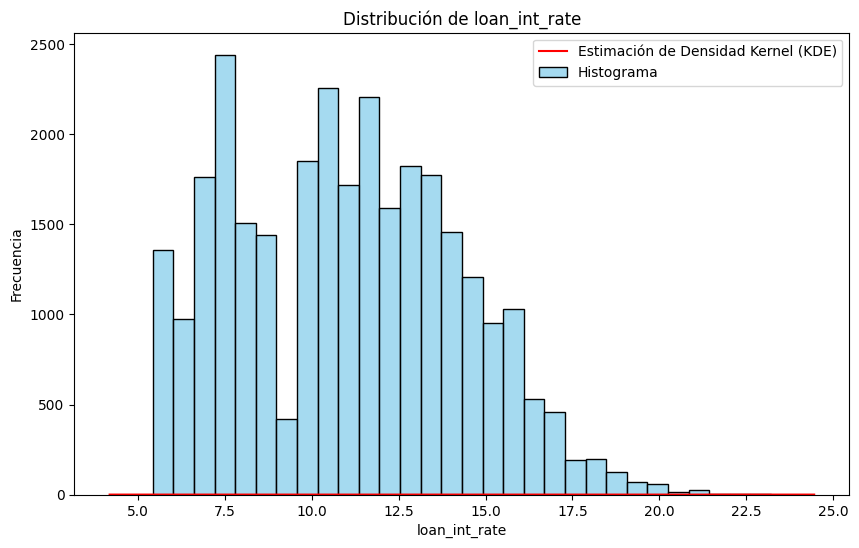

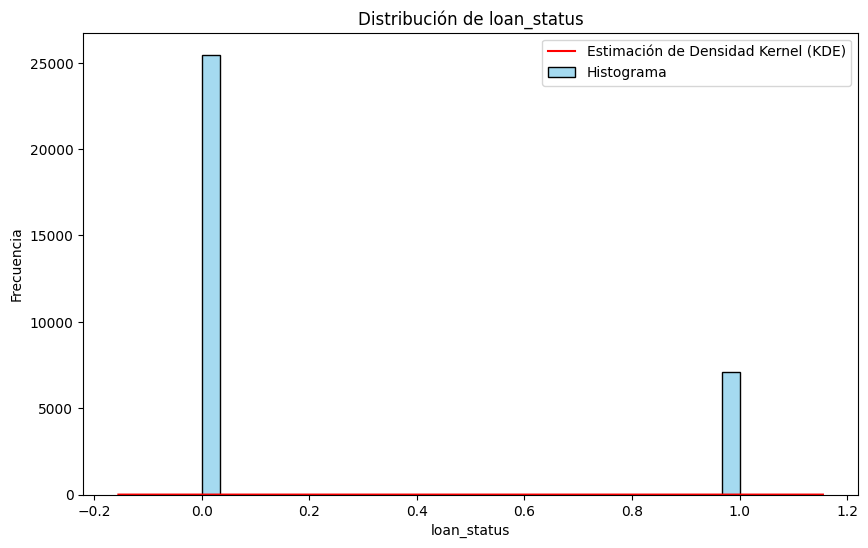

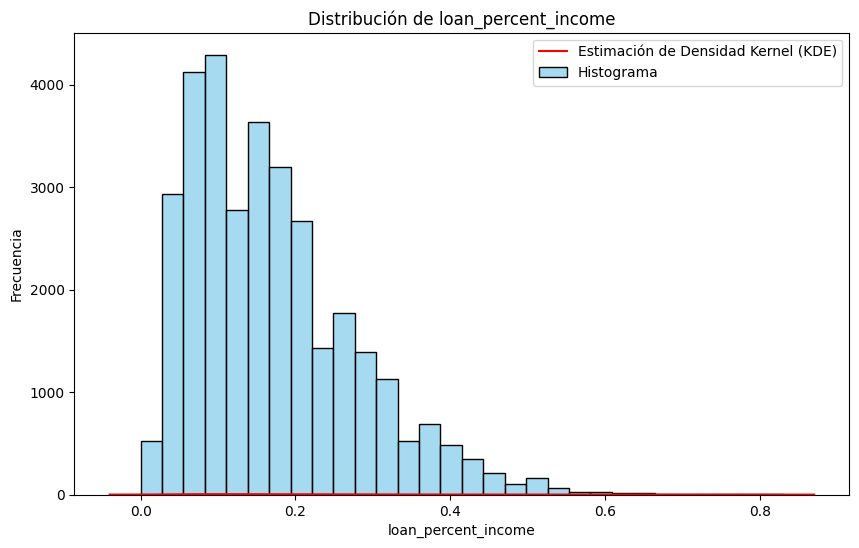

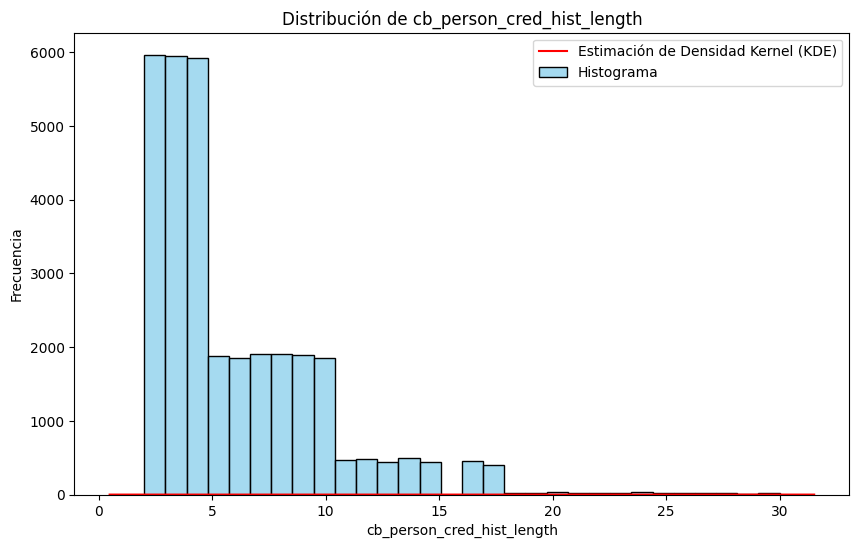

In [11]:
# Lista de columnas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Visualizar histogramas y gráficos KDE
for column in numeric_columns:
    plt.figure(figsize=(10, 6))

    # Histograma
    sns.histplot(df[column], kde=False, bins=30, color='skyblue', label='Histograma')

    # KDE
    sns.kdeplot(df[column], color='red', label='Estimación de Densidad Kernel (KDE)')

    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.show()


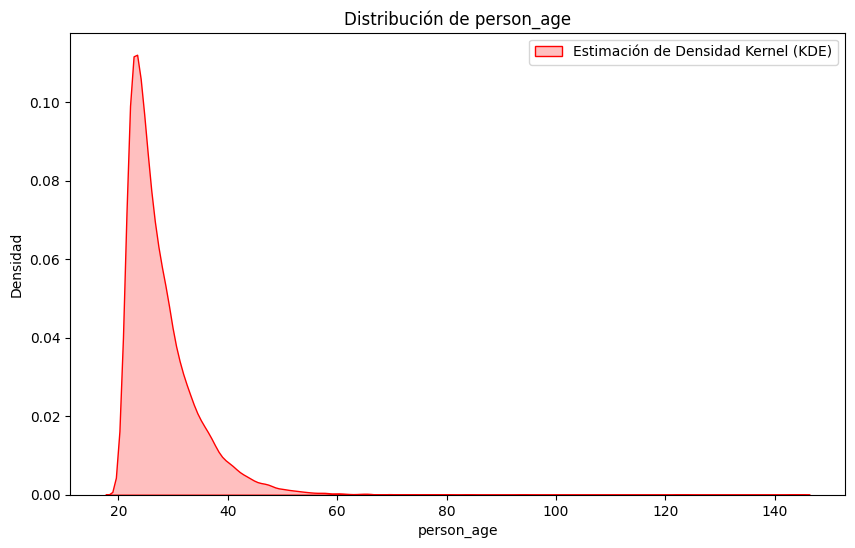

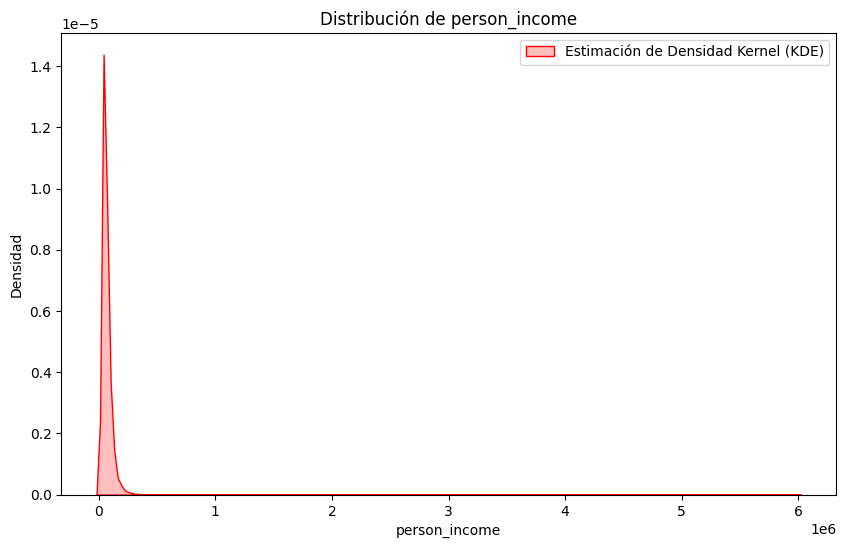

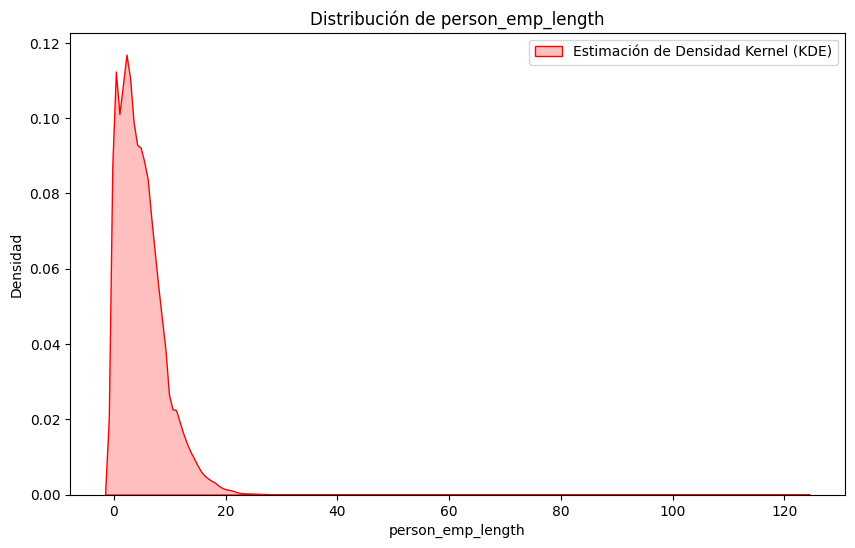

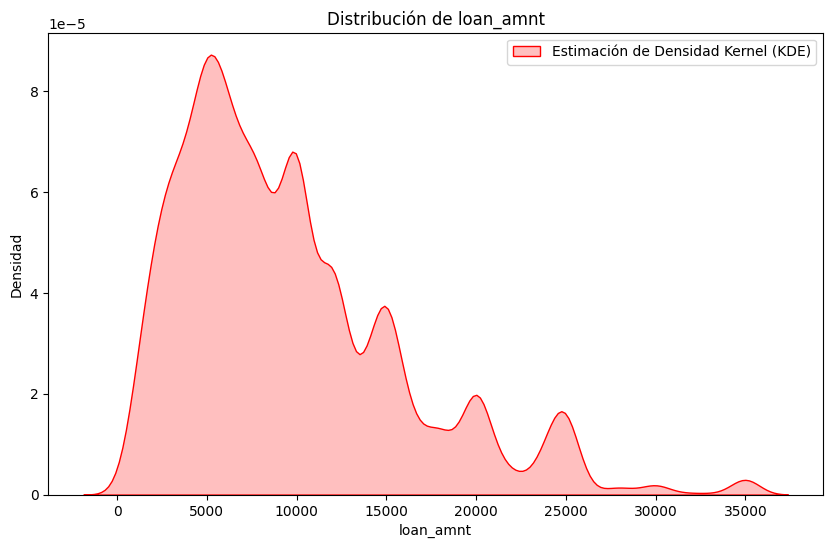

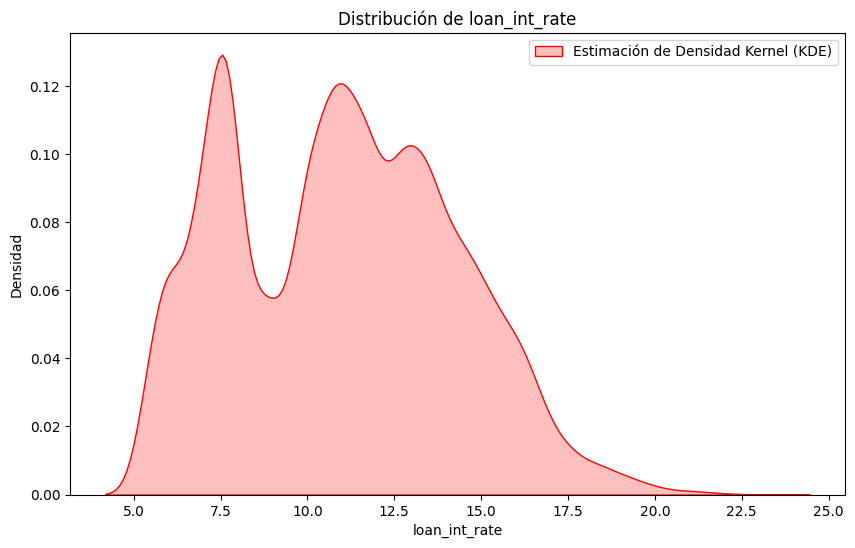

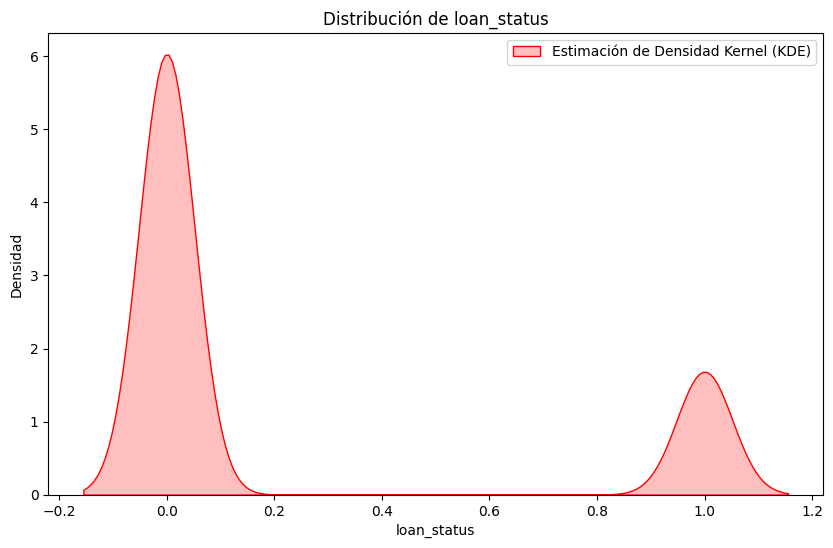

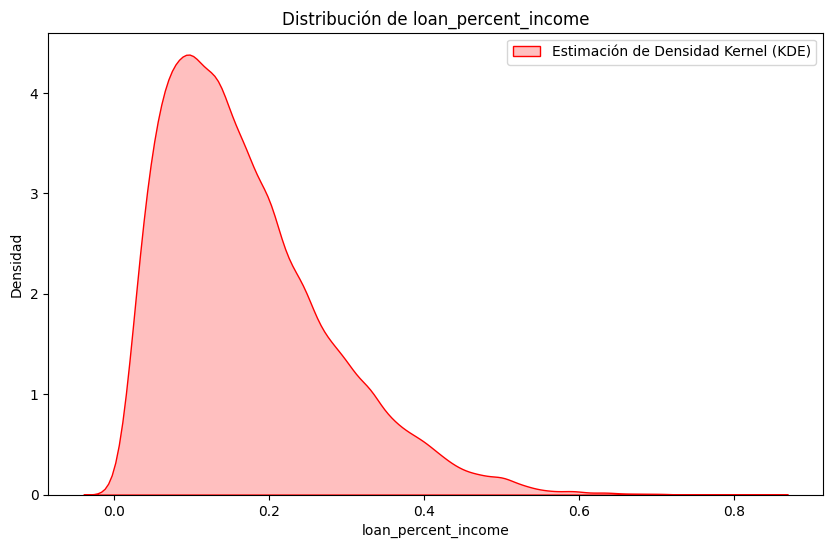

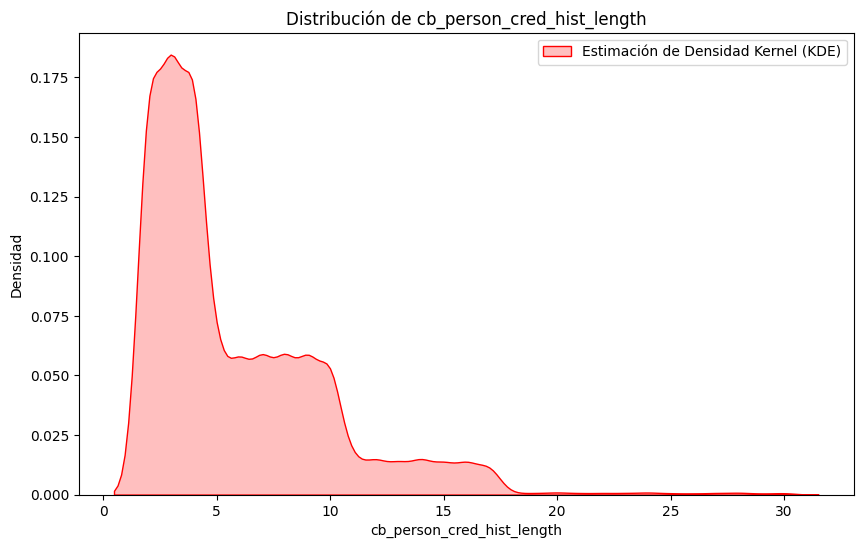

In [12]:
# Lista de columnas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Visualizar gráficos KDE
for column in numeric_columns:
    plt.figure(figsize=(10, 6))

    # KDE con el argumento fill
    sns.kdeplot(df[column], color='red', fill=True, label='Estimación de Densidad Kernel (KDE)')

    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Densidad')
    plt.legend()
    plt.show()


5. Emplea boxplots para mostrar la distribución de los
datos a través de sus cuartiles.

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

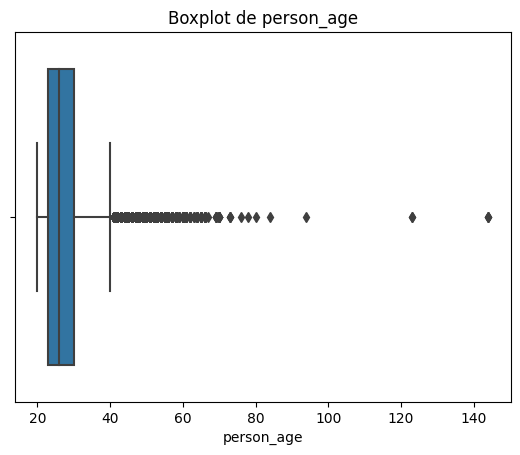

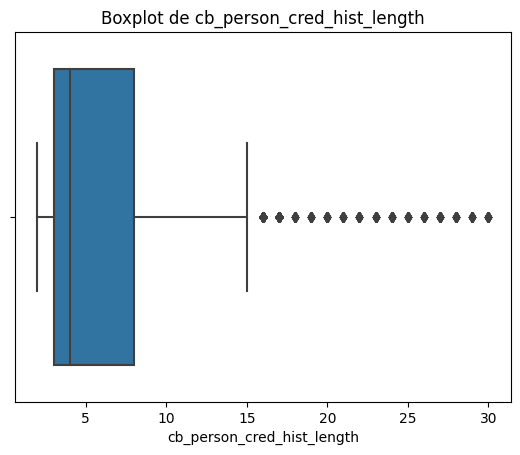

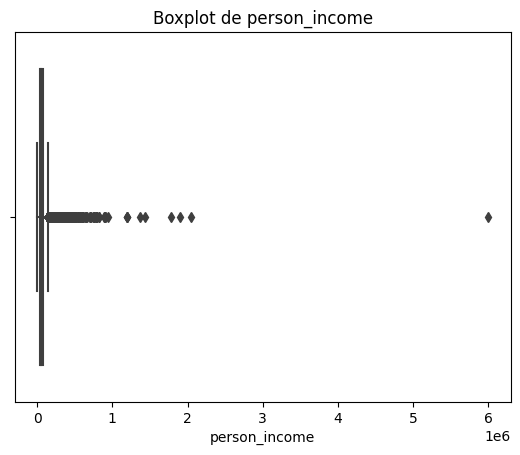

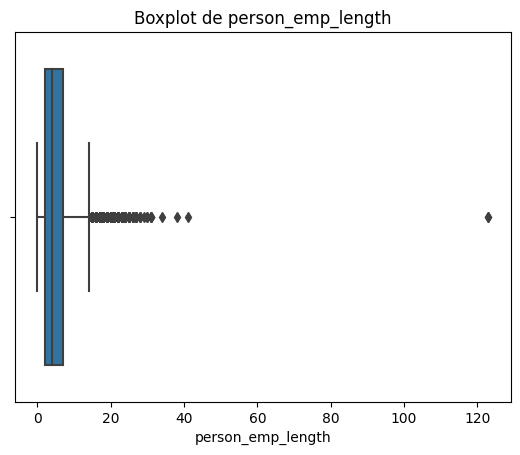

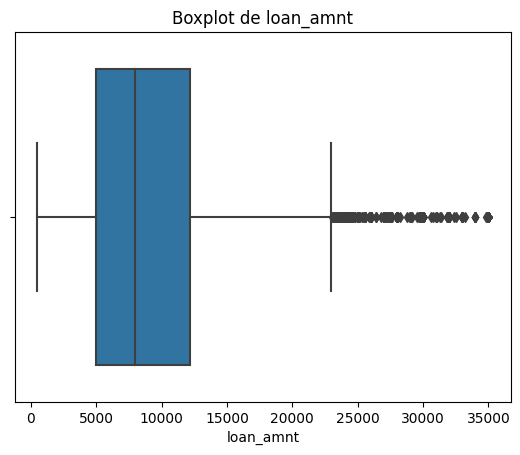

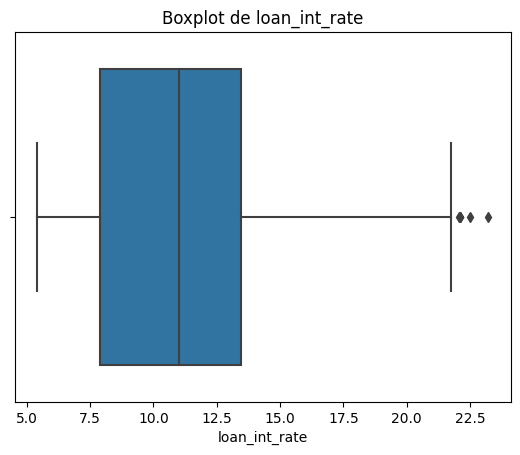

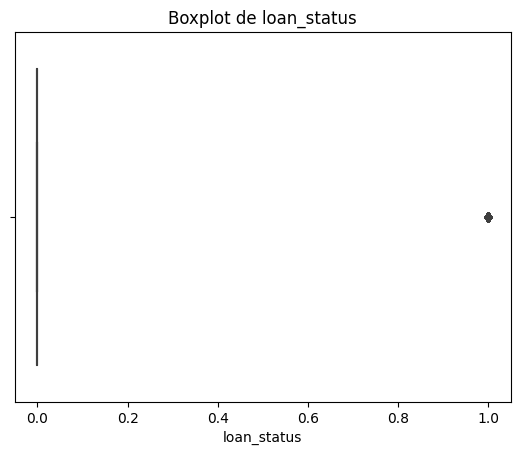

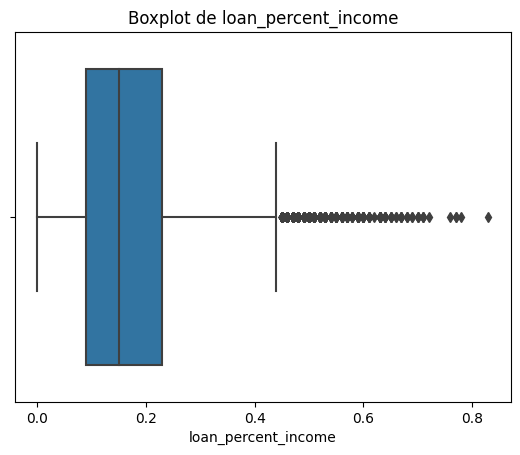

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot para 'person_age'
sns.boxplot(data=df, x='person_age')
plt.title('Boxplot de person_age')
plt.show()

# Boxplot para 'cb_person_cred_hist_length'
sns.boxplot(data=df, x='cb_person_cred_hist_length')
plt.title('Boxplot de cb_person_cred_hist_length')
plt.show()

# Boxplot para 'person_income'
sns.boxplot(data=df, x='person_income')
plt.title('Boxplot de person_income')
plt.show()

# Boxplot para 'person_emp_length'
sns.boxplot(data=df, x='person_emp_length')
plt.title('Boxplot de person_emp_length')
plt.show()

# Boxplot para 'loan_amnt'
sns.boxplot(data=df, x='loan_amnt')
plt.title('Boxplot de loan_amnt')
plt.show()

# Boxplot para 'loan_int_rate'
sns.boxplot(data=df, x='loan_int_rate')
plt.title('Boxplot de loan_int_rate')
plt.show()

# Boxplot para 'loan_status'
sns.boxplot(data=df, x='loan_status')
plt.title('Boxplot de loan_status')
plt.show()

# Boxplot para 'loan_percent_income'
sns.boxplot(data=df, x='loan_percent_income')
plt.title('Boxplot de loan_percent_income')
plt.show()



*   Como podrás observar hay valores atípicos en todas las variables. Ejecuta el siguiente código para identificar los valores atípicos en la variable `person_age`

In [ ]:
percentile_25 = df["person_age"].quantile(0.25)
percentile_75 = df["person_age"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df[(df["person_age"] < lower_limit) | (df["person_age"] > upper_limit)]
IQR_outliers

# Análisis de variables categóricas

 6. Obtén las siguientes estadísticas descriptivas para todas las variables categóricas:
*   Tendencia central (moda)
*   Cardinalidad (cantidad de valores únicos)
*   Recuentos únicos (número de ocurrencias para cada valor único)

**NOTA**. Un resumen de estas estadísticas, puedes obtenerlas indicando en la función `describe()` que se incluirán sólo las variables de tipo object, que en este caso coinciden con las categóricas: `describe(include = 'object')`. Para los recuentos utiliza la función `df["columna"].value_counts()`

In [20]:
modas = df.select_dtypes(include='object').mode().iloc[0]
print("Moda para las variables categóricas:")
print(modas)


Moda para las variables categóricas:
person_home_ownership             RENT
loan_intent                  EDUCATION
loan_grade                           A
cb_person_default_on_file            N
Name: 0, dtype: object


In [21]:
cardinalidades = df.select_dtypes(include='object').nunique()
print("\nCardinalidad para las variables categóricas:")
print(cardinalidades)



Cardinalidad para las variables categóricas:
person_home_ownership        4
loan_intent                  6
loan_grade                   7
cb_person_default_on_file    2
dtype: int64


In [22]:
print("\nRecuentos únicos para las variables categóricas:")
for columna in df.select_dtypes(include='object').columns:
    print(f"\n{columna}:")
    print(df[columna].value_counts())



Recuentos únicos para las variables categóricas:

person_home_ownership:
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64

loan_intent:
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64

loan_grade:
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64

cb_person_default_on_file:
N    26836
Y     5745
Name: cb_person_default_on_file, dtype: int64


7. Utiliza gráficos de barras por variable para representar la frecuencia de cada categoría.

**NOTA**. seaborn posee un gráfico de recuento, para variables categóricas, que calcula la frecuencia de cada categoría sin necesidad de utilizar la función `value_counts()`. Para generarlo debes indicar la columna: `sns.countplot(x="columna", data=df) `

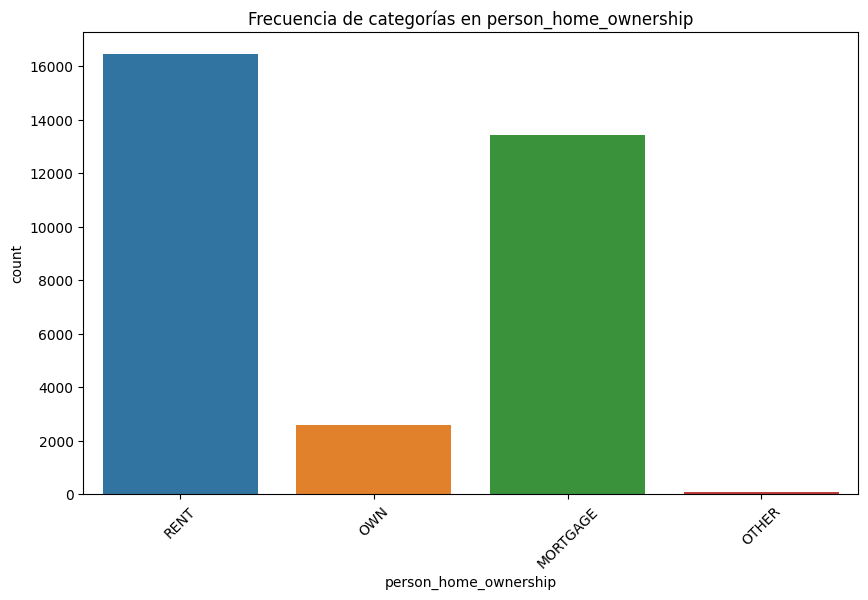

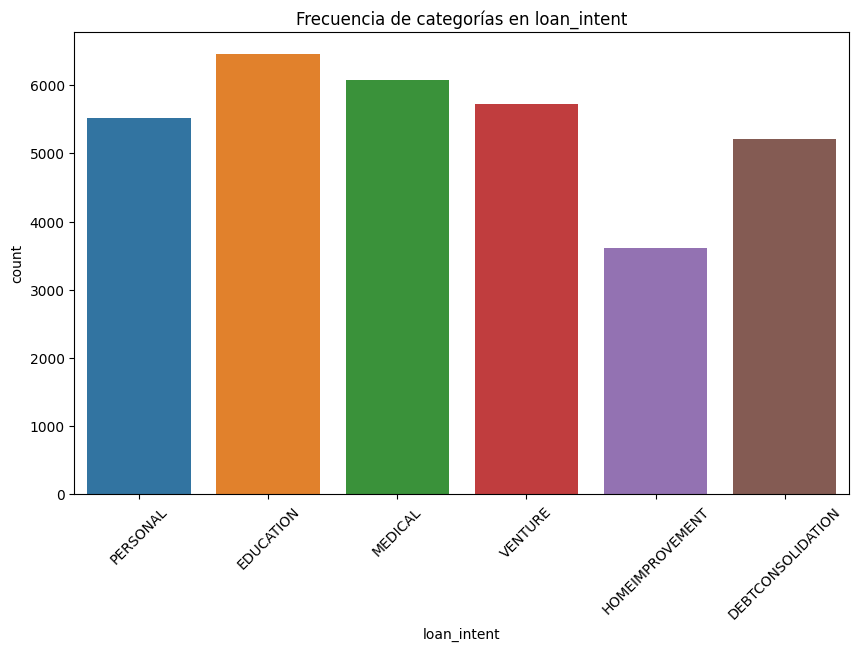

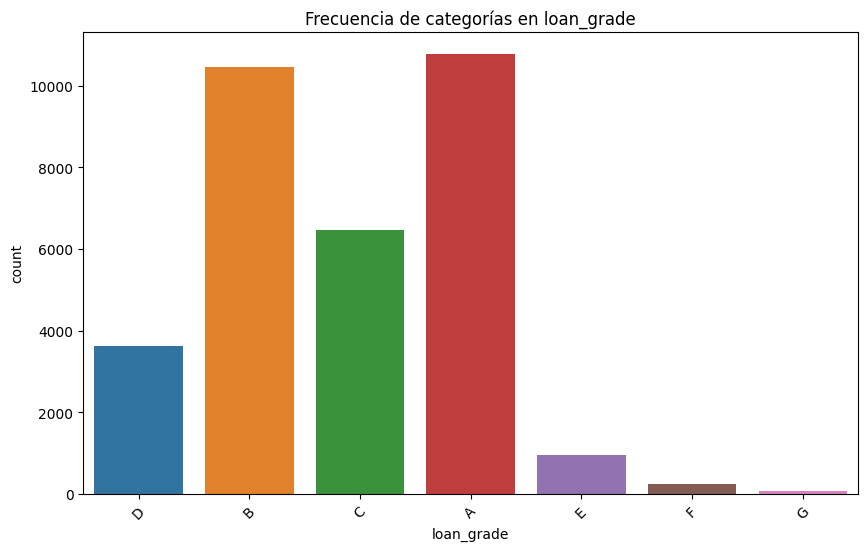

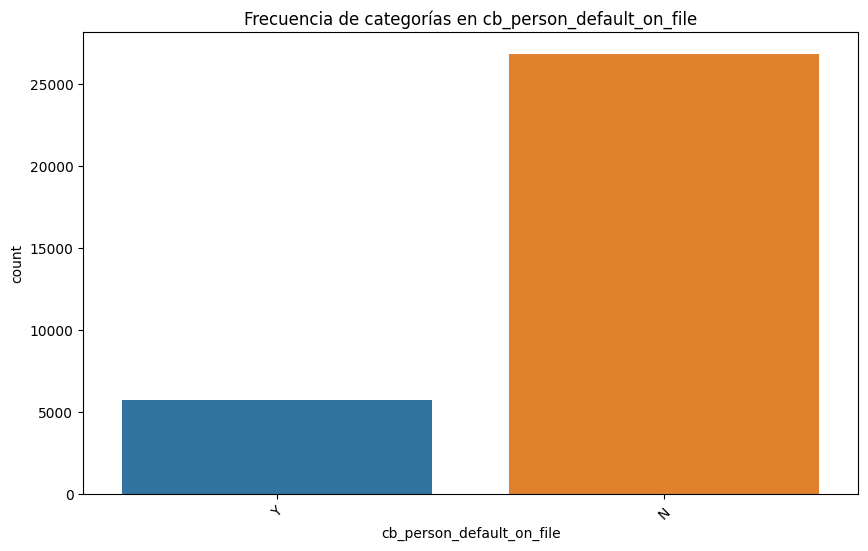

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de columnas categóricas en el dataframe
columnas_categoricas = df.select_dtypes(include='object').columns

# Creación de gráficos de barras para cada columna categórica
for columna in columnas_categoricas:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=columna, data=df)
    plt.title(f'Frecuencia de categorías en {columna}')
    plt.xticks(rotation=45)
    plt.show()


# **Parte 2**. Análisis de correlación (bivariante y multivariante)

La variable `loan_status` será la variable de salida (o a predecir en un modelo de ML). Analiza su relación con el resto de las variables a través de los siguientes gráficos:

8. Un box plot para visualizar la distribución de `loan_percent_income` según el `load_status`. Interpreta el resultado.

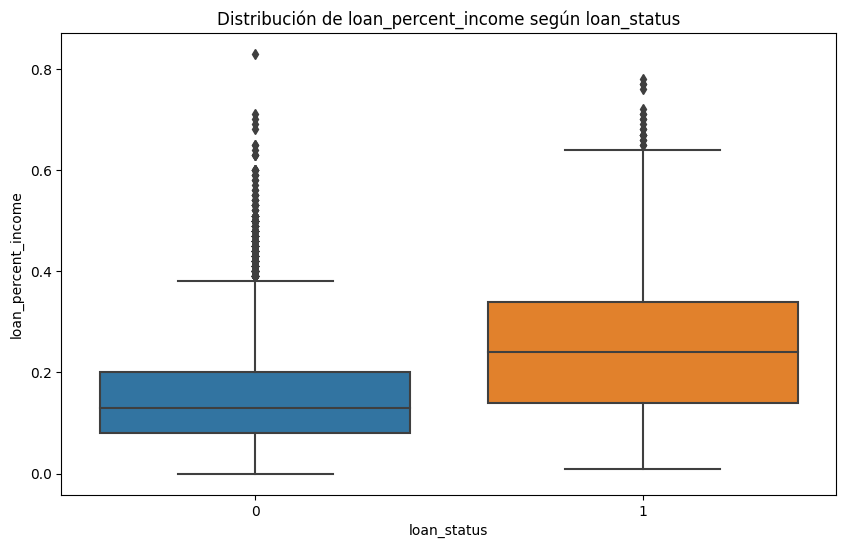

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot para visualizar la distribución de loan_percent_income según loan_status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_percent_income', data=df)
plt.title('Distribución de loan_percent_income según loan_status')
plt.show()


Basándonos en el gráfico, parece que hay una relación entre el loan_percent_income y el loan_status. Aquellos con un mayor porcentaje de ingreso comprometido al préstamo tienden a caer más en la categoría loan_status = 1 en comparación con loan_status = 0. Además, ambos grupos tienen casos extremos donde el porcentaje del ingreso comprometido al préstamo es inusualmente alto.

Para loan_status = 0: La mediana se encuentra cerca de 0.2, lo que sugiere que la mitad central de los datos para esta categoría tiene un loan_percent_income del 20% o menos.

Para loan_status = 1: La mediana es más alta, alrededor de 0.3, indicando que los préstamos con loan_status de 1 tienden a tener un mayor porcentaje de ingreso comprometido al préstamo en comparación con loan_status de 0.

9. En los gráficos de barras que obtuviste en el ejercicio 7, separa el conteo según el `load_status`, utilizando el parámetro `hue`.

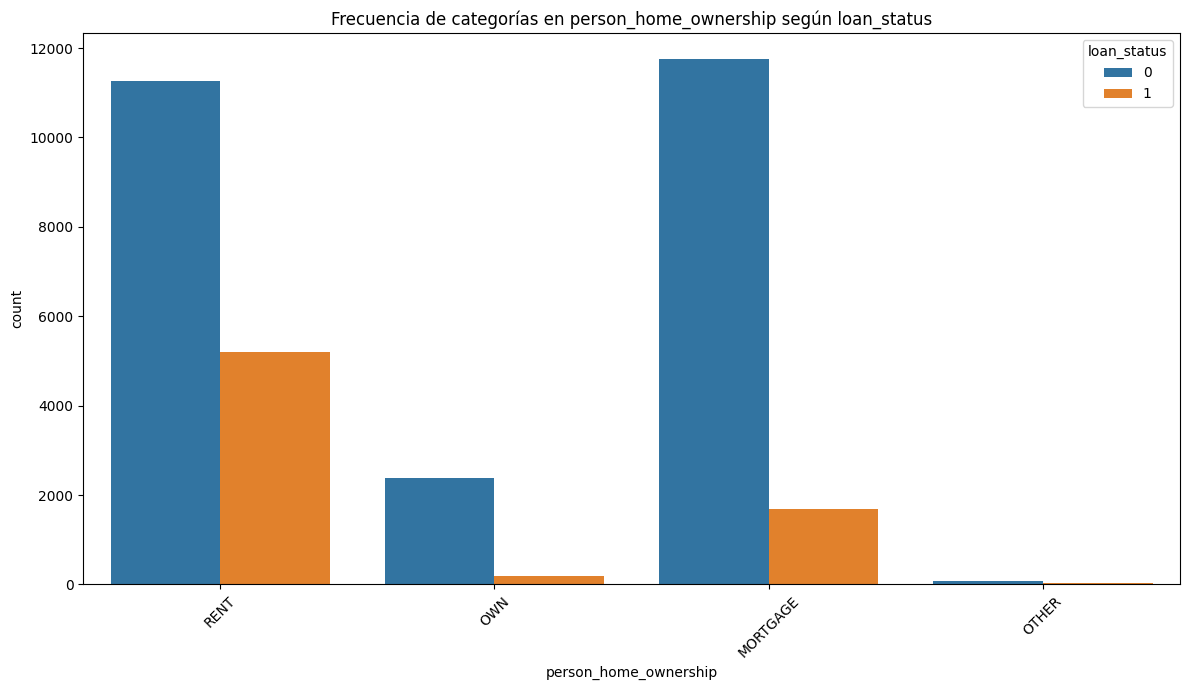

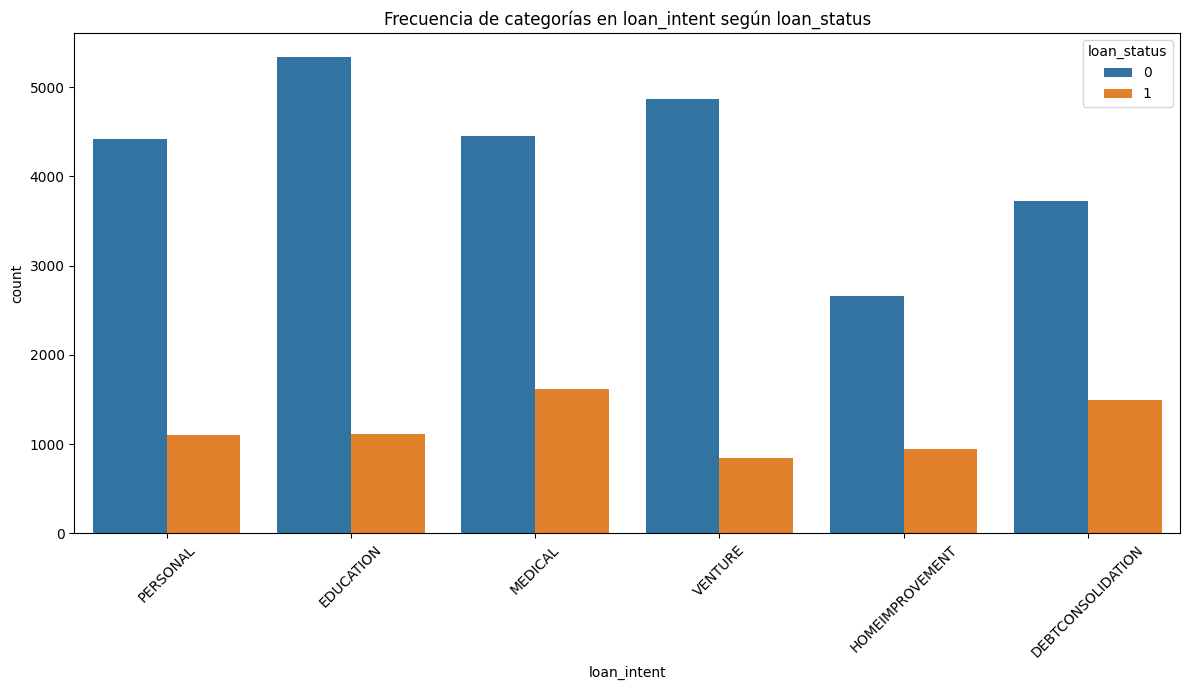

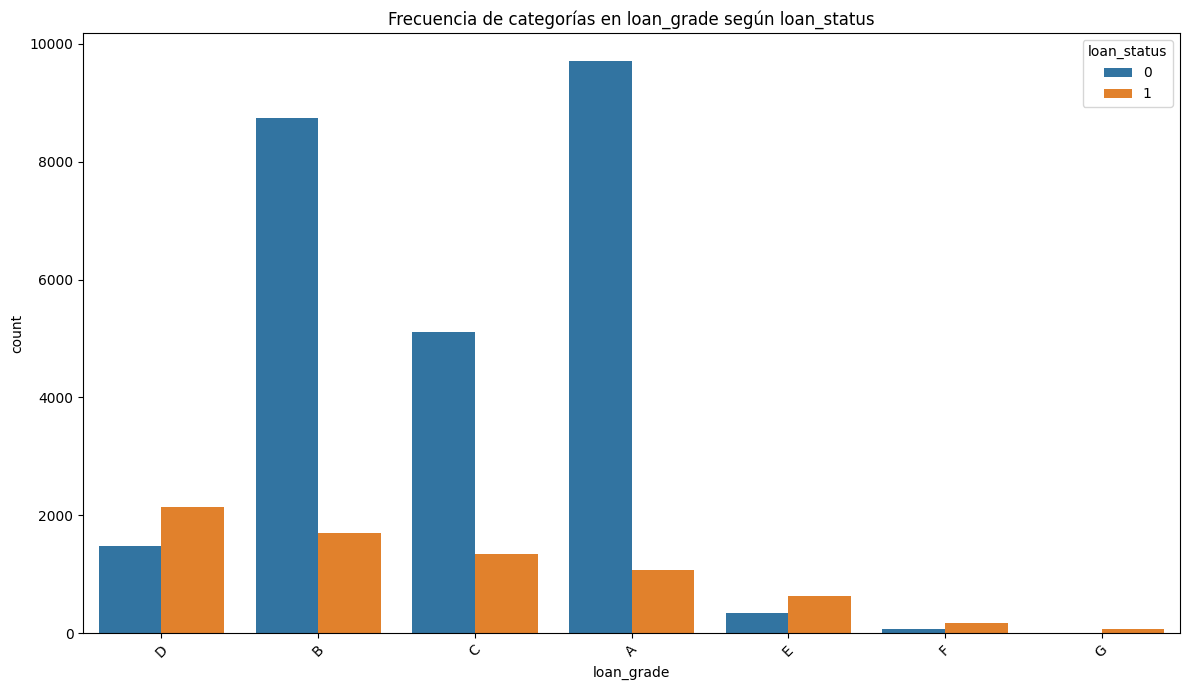

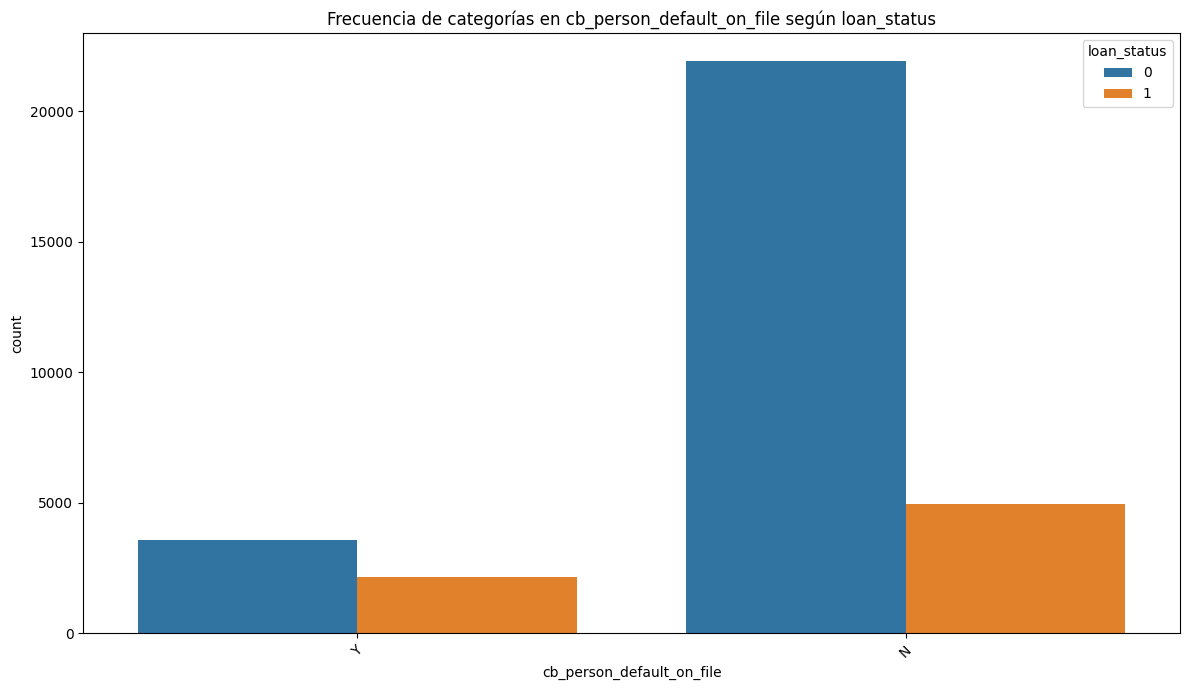

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de columnas categóricas (sin incluir 'loan_status')
columnas_categoricas = df.select_dtypes(include='object').columns.tolist()
if 'loan_status' in columnas_categoricas:
    columnas_categoricas.remove('loan_status')

# Crear un gráfico de recuento para cada columna categórica
for columna in columnas_categoricas:
    plt.figure(figsize=(12, 7))
    sns.countplot(x=columna, data=df, hue='loan_status')
    plt.title(f'Frecuencia de categorías en {columna} según loan_status')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.legend(title='loan_status', loc='upper right')
    plt.show()


10. Un mapa de calor con los valores de correlación de todas las variables del dataframe.
*   ¿Qué variable tiene mayor correlación con `loan_status`?

<ipython-input-26-89d5ff0e83d2>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


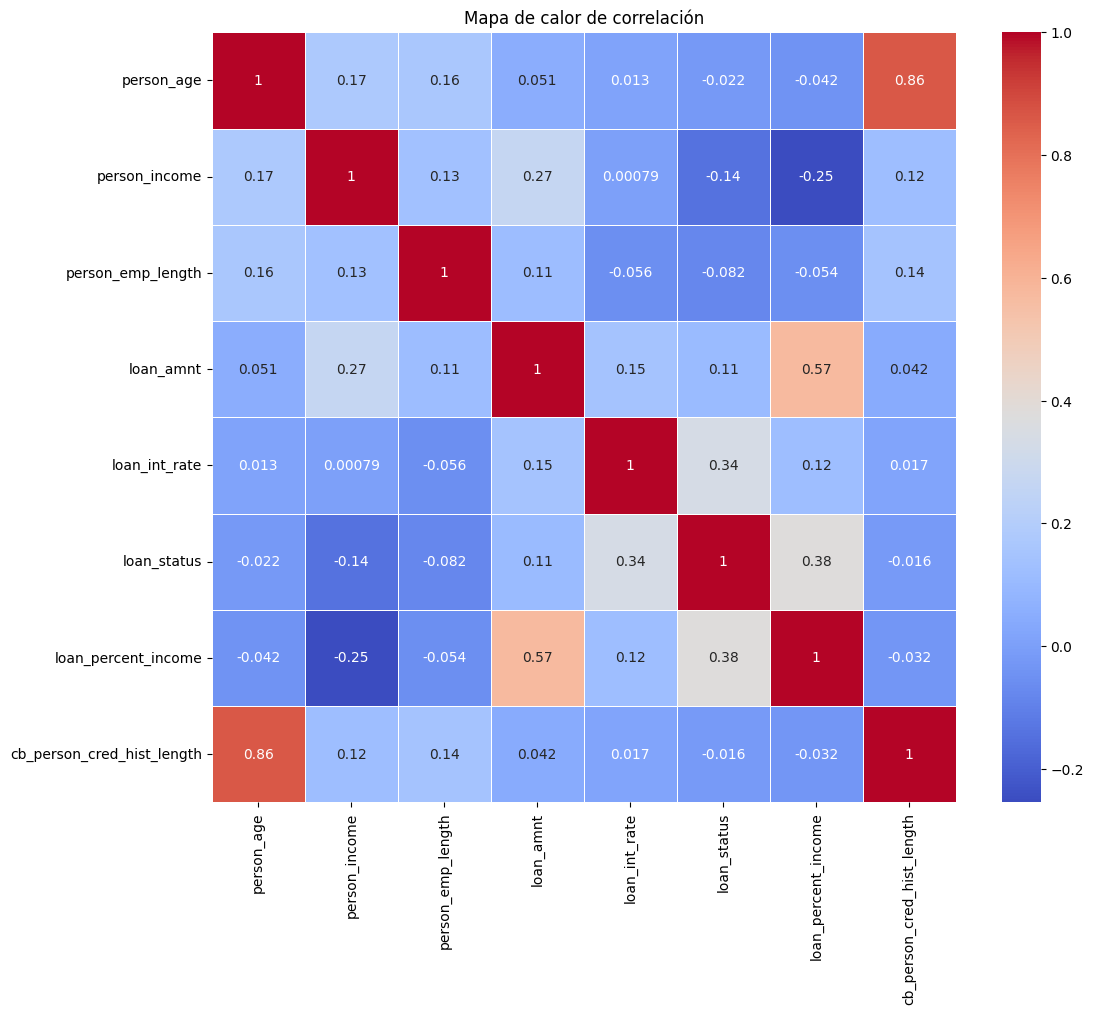

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcula la matriz de correlación
correlation_matrix = df.corr()

# Configura el tamaño del gráfico
plt.figure(figsize=(12, 10))

# Crea el mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Muestra el gráfico
plt.title('Mapa de calor de correlación')
plt.show()


In [27]:
# Elimina la correlación de la misma variable (porque siempre será 1)
correlation_with_loan_status = correlation_matrix['loan_status'].drop('loan_status')

# Encuentra la variable con la mayor correlación (en valor absoluto)
max_correlation_var = correlation_with_loan_status.abs().idxmax()
max_correlation_value = correlation_with_loan_status[max_correlation_var]

print(f"La variable con mayor correlación con 'loan_status' es '{max_correlation_var}' con un valor de correlación de {max_correlation_value:.2f}.")


La variable con mayor correlación con 'loan_status' es 'loan_percent_income' con un valor de correlación de 0.38.
